# Facial Recognition

**128 landmarks**
- Facial encoding  
When we run an input face image through a pre-trained face-recognition model, a set of 128 measurements are generated. These 128 float numbers correspond to the encoding of a particular face. 
- Every face will have a different encoding set.
- A face recognition model is trained to take in an input image, and generate an output of a face landmark encodings.
   - In other words, similar-looking faces will have similar encodings, whereas different looking faces' measurements will vary to a relatively greater extent.

**References**
- Adarsh Menon (2020) Face Recognition in Python using face_recognition Library (in Google Colab) 
https://www.youtube.com/watch?v=987QtKPZ-P0&ab_channel=AdarshMenon

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 9.4 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=04495d1830d6f9e820d35481cb7cfb943e0799313cf51811024b020fa7a2a28e
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [3]:
!mkdir known
!wget https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg -O known/elon.jpg
!wget https://upload.wikimedia.org/wikipedia/commons/a/a8/Bill_Gates_2017_%28cropped%29.jpg -O known/bill.jpg
!wget https://www.biography.com/.image/t_share/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg -O known/obama.jpg

mkdir: cannot create directory ‘known’: File exists
--2021-11-08 08:41:48--  https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg
Resolving www.biography.com (www.biography.com)... 151.101.194.98, 151.101.66.98, 151.101.2.98, ...
Connecting to www.biography.com (www.biography.com)|151.101.194.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151791 (148K) [image/jpeg]
Saving to: ‘known/elon.jpg’

known/elon.jpg      100%[===================>] 148.23K  --.-KB/s    in 0.02s   

2021-11-08 08:41:48 (6.74 MB/s) - ‘known/elon.jpg’ saved [151791/151791]

--2021-11-08 08:41:49--  https://upload.wikimedia.org/wikipedia/commons/a/a8/Bill_Gates_2017_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1265579 (1.2M) [image/jpe

In [4]:
!mkdir unknown
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg

--2021-11-08 08:42:12--  https://i.insider.com/5ddfa893fd9db26b8a4a2df7
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2324104 (2.2M) [image/png]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]   2.22M  --.-KB/s    in 0.06s   

2021-11-08 08:42:12 (36.4 MB/s) - ‘unknown/1.jpg’ saved [2324104/2324104]

--2021-11-08 08:42:12--  https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg
Resolving cdn-images-1.medium.com (cdn-images-1.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9804, ...
Connecting to cdn-images-1.medium.com (cdn-images-1.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119795 (117K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>] 116.99K  --.-KB/s  

In [5]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [9]:
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

In [23]:
known_encodings = []
known_names = []
known_dir = '/content/known/'

## Training - generate 128 measurements

In [24]:
for file in os.listdir(known_dir):
    img = read_img(known_dir + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

In [18]:
known_encodings[0]

array([-9.37155336e-02,  1.00619927e-01,  8.02362859e-02, -1.93564594e-02,
       -2.16600671e-02,  2.34841257e-02, -5.90442978e-02, -6.24933392e-02,
        1.98365018e-01, -1.44333392e-01,  2.72563726e-01,  7.80184716e-02,
       -2.43261456e-01, -1.47890851e-01,  1.12890795e-01,  1.23418480e-01,
       -1.94451153e-01, -7.58769810e-02, -1.13273226e-01, -7.45402873e-02,
       -7.89731741e-04,  1.78427286e-02,  7.93276131e-02,  1.63510442e-04,
       -8.84389505e-02, -4.15172428e-01, -4.94912602e-02, -1.35952115e-01,
        1.59173198e-02, -2.04183310e-01, -1.04437605e-01, -2.64317840e-02,
       -1.52686805e-01, -8.12954828e-02, -4.34065089e-02, -1.37451962e-02,
       -3.10926549e-02, -2.86867507e-02,  1.94469288e-01,  1.76185071e-02,
       -1.57620996e-01,  2.82194167e-02,  3.88695300e-03,  1.88718796e-01,
        2.47377962e-01,  8.42690319e-02, -2.83680111e-03, -4.99368049e-02,
        1.24155194e-01, -2.40347132e-01,  6.60929978e-02,  1.57668158e-01,
        1.02042079e-01,  

### `compare_faces`

In [35]:
PATH = '/content/unknown/'
unknown_dir = os.listdir(PATH)
unknown_dir.sort()

for file in unknown_dir:
    print("Processing", file)
    img = read_img(PATH + file)
    img_enc = face_recognition.face_encodings(img)[0]

    # compare_faces method - compares the known and unkonw encodings
    #                        and returns boolean array.
    results = face_recognition.compare_faces(known_encodings, img_enc)

    for i in range(len(results)):
        if results[i]:
            print(known_names[i], end="\n")

    print(results)

Processing 1.jpg
elon
[False, True, False]
Processing 2.jpg
[False, False, False]
Processing 3.jpg
bill
[False, False, True]
Processing 4.jpg
obama
[True, False, False]


### Draw and mark labels

Processing 1.jpg
[False, True, False]
[0.83622429 0.49094304 0.71823377]


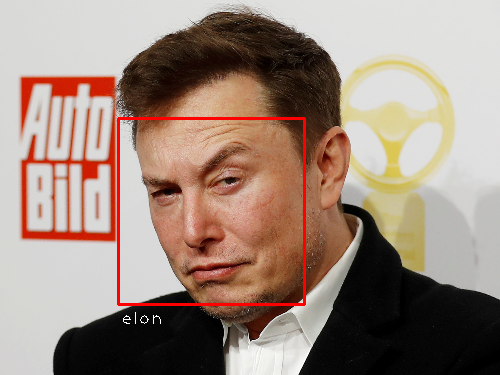

Processing 2.jpg
[False, False, False]
[0.70370525 0.86077043 0.87576239]
Processing 3.jpg
[False, False, True]
[0.87211205 0.82839217 0.5330841 ]


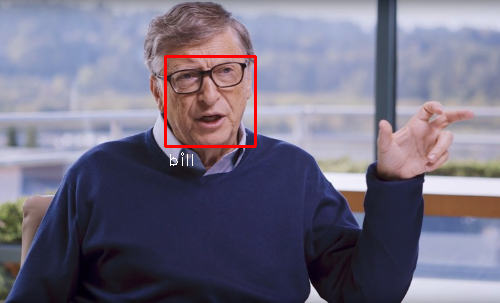

Processing 4.jpg
[True, False, False]
[0.36119883 0.84514967 0.80494699]


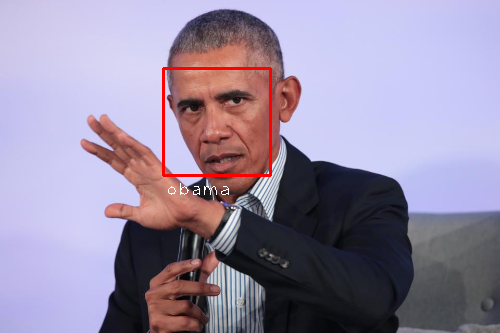

In [39]:
PATH = '/content/unknown/'
unknown_dir = os.listdir(PATH)
unknown_dir.sort()

for file in unknown_dir:
    print("Processing", file)
    img = read_img(PATH + file)
    img_enc = face_recognition.face_encodings(img)[0]

    # compare_faces returns boolean value according to a certain comparison threshold.
    results = face_recognition.compare_faces(known_encodings, img_enc)
    print(results)
    print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0,0,255), 2)
            cv2.putText(img, name, (left + 2, bottom + 20), cv2.FONT_HERSHEY_PLAIN, 1.25, (255, 255, 255), 1)
            cv2_imshow(img)